In [34]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Input, Conv2D, MaxPooling2D, BatchNormalization,MaxPool2D
import tensorflow as tf

In [19]:
import tensorflow.keras
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten ,BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import os
import numpy as np
import pandas as pd
from scipy.misc import imread
seed = 569874
rng = np.random.RandomState(seed)
import matplotlib.pyplot as pylab
%matplotlib inline

In [5]:
TRAIN_DIR = 'Parasitized'
TEST_DIR = 'Uninfected'

IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3 # RGB color

In [127]:
import os

path ='\Parasitized\*.png'

files = []
# r=root, d=directories, f = files
for r, d, f in os.walk(r'C:\Users\asus\ML\ML_Basics\Deep_learning\Malaria_Medical\cell-images-for-detecting-malaria\cell_images\Parasitized'):
    for file in f:
        if '.png' in file:
            files.append((file))


import os

#path ='\Uninfected\*.png'

filesu = []
# r=root, d=directories, f = files
for r, d, f in os.walk(r'C:\Users\asus\ML\ML_Basics\Deep_learning\Malaria_Medical\cell-images-for-detecting-malaria\cell_images\Uninfected'):
    for file in f:
        if '.png' in file:
            filesu.append((file))


TargetP =['Parasitized']*len(files)

TargetU =['Uninfected']*len(filesu)

files.extend(filesu)
TargetP.extend(TargetU)

Mal = {
    'Location':files,
    'Target':TargetP
}
df = pd.DataFrame(Mal)

In [126]:
import os 
  
# Function to rename multiple files 
def rename(): 
    i = 0
      
    for filename in os.listdir("Uninfected"): 
            dst ="Uninfected."+str(i) +".png"
            src ='Uninfected/'+ filename 
            dst ="Uninfected/"+ dst 
            os.rename(src,dst) 
            
            i += 1
        
rename()

import os 
  
# Function to rename multiple files 
def rename(): 
    i = 0
      
    for filename in os.listdir("Parasitized"): 
            dst ="Parasitized."+str(i) +".png"
            src ='Parasitized/'+ filename 
            dst ="Parasitized/"+ dst 
            os.rename(src,dst) 
            
            i += 1
        
rename()

# Start

In [2]:
import os
filenames = os.listdir("BT")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'Parasitized':
        categories.append('1')
    else:
        categories.append('0')

        
        
df = pd.DataFrame({
    'filename': filenames,
    'category': categories,
    
})

In [3]:
df.head()

,category,filename
0,1,Parasitized.0.png
1,1,Parasitized.1.png
2,1,Parasitized.10.png
3,1,Parasitized.100.png
4,1,Parasitized.1000.png


In [6]:
from sklearn.utils import shuffle
df = shuffle(df)

In [7]:
df.head()

,category,filename
11089,1,Parasitized.7578.png
7682,1,Parasitized.4510.png
7098,1,Parasitized.3986.png
20293,0,Uninfected.3460.png
26917,0,Uninfected.9422.png


In [8]:
df.shape

(27557, 2)

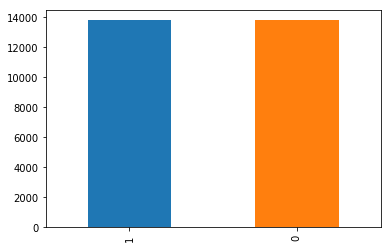

In [9]:
df['category'].value_counts().plot.bar()

In [10]:
seed = 128
rng = np.random.RandomState(seed)

C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


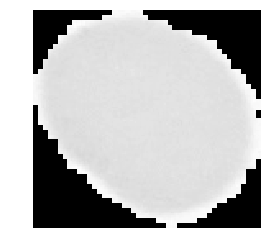

In [11]:
from scipy.misc import imread
import matplotlib.pyplot as pylab
img_name = rng.choice(df.loc[df['category'] == '0'].filename)
filepath = os.path.join('BT',  img_name)

img = imread(filepath, flatten=True)

pylab.imshow(img, cmap='gray')
pylab.axis('off')
pylab.show()

C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


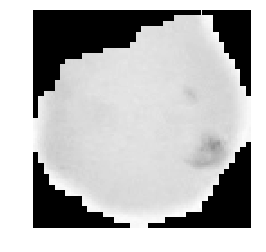

In [12]:
from scipy.misc import imread
import matplotlib.pyplot as pylab
img_name = rng.choice(df.loc[df['category'] == '1'].filename)
filepath = os.path.join('BT',  img_name)

img = imread(filepath, flatten=True)

pylab.imshow(img, cmap='gray')
pylab.axis('off')
pylab.show()

In [13]:
from sklearn.model_selection import train_test_split
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

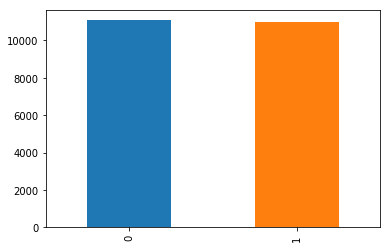

In [14]:
train_df['category'].value_counts().plot.bar()

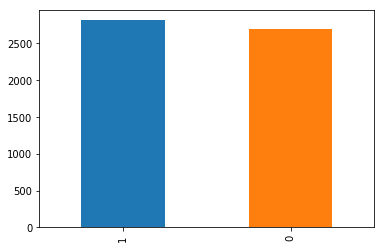

In [15]:
validate_df['category'].value_counts().plot.bar()

In [16]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

In [17]:
train_df.head()

,category,filename
0,0,Uninfected.1554.png
1,0,Uninfected.9509.png
2,1,Parasitized.10669.png
3,1,Parasitized.13248.png
4,1,Parasitized.6082.png


In [21]:
train_df.shape

(22045, 2)

In [35]:
print('ji')

ji


In [36]:
train_image = []
for i in tqdm(range(train_df.shape[0])):
    img = image.load_img('BT/'+train_df['filename'][i],target_size=(64,64,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|████████████████████████████████████████████████████████████████████████████| 22045/22045 [10:52<00:00, 33.78it/s]


In [32]:
validate_image = []
for i in tqdm(range(validate_df.shape[0])):
    img = image.load_img('BT/'+validate_df['filename'][i],target_size=(64,64,3))
    img = image.img_to_array(img)
    img = img/255
    validate_image.append(img)
X_validate = np.array(validate_image)

100%|██████████████████████████████████████████████████████████████████████████████| 5512/5512 [02:19<00:00, 39.40it/s]


In [37]:
X.shape

(22045, 64, 64, 3)

In [38]:
X_validate.shape

(5512, 64, 64, 3)

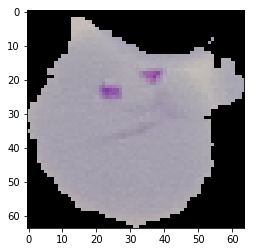

In [39]:
plt.imshow(X[4])

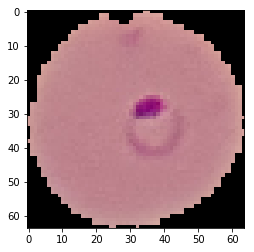

In [40]:
plt.imshow(X_validate[4])

In [41]:
y = np.array(train_df.drop(['filename'],axis=1))
y.shape

(22045, 1)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# MEDICAL DOMAIN THESIS

### Early Stop

To prevent over fitting we will stop the learning after 10 epochs and val_loss value not decreased

### Learning Rate Reduction

We will reduce the learning rate when then accuracy not increase for 2 steps

In [43]:
# Importing the required Keras modules containing model and layers

from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.models import Sequential
# Creating a Sequential Model and adding the layers
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(64,64,3)) , 
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1, activation='sigmoid')
])
print(model.summary())
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=30, validation_split=0.1, batch_size=15,verbose=2,shuffle=True)

Using TensorFlow backend.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 16)        448       
_________________________________________________________________
batch_normalization_v2 (Batc (None, 62, 62, 16)        64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 15376)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                984128    
_________________________________________________________________
batch_normalization_v2_1 (Ba (None, 64)                2

In [44]:
model.save('Basic_acc(95.41)_high_dimenssional_1_CNN.h5')

In [ ]:
model.evaluate(test_x, test_y)

In [48]:
X_test.shape

(4409, 64, 64, 3)

In [50]:
predio = model.predict(X_test)
predio= predio.round()

In [54]:
y_test = y_test.astype('int64')

In [55]:
predio = predio.astype('int64')

In [58]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predio))
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predio)

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      2205
           1       0.93      0.86      0.90      2204

   micro avg       0.90      0.90      0.90      4409
   macro avg       0.90      0.90      0.90      4409
weighted avg       0.90      0.90      0.90      4409



0.8995237015196189

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      320       
_________________________________________________________________
batch_normalization_v2_2 (Ba (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_v2_3 (Ba (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)       